### Import the Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import math

import warnings
warnings.filterwarnings('ignore')

### Display Settings

In [2]:
pd.set_option('display.max_rows', None)

### Load the dataset

In [99]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [100]:
df.shape

(13320, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [102]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Data Cleaning

#### Drop the features that are not required to build our model

In [103]:
df1 = df.drop(columns=["area_type","availability","society", "balcony"])
df1.shape

(13320, 5)

In [104]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### check for duplicates

In [106]:
df1.duplicated().sum()

882

In [108]:
(
    df1
    .loc[df1.duplicated()]
    .sort_values(by=['location','size'])
)

,location,size,total_sqft,bath,price
1363,Thanisandra,1 RK,510,1.0,25.25
12126,2nd Block Bel Layout,3 BHK,1625,3.0,92.00
1905,2nd Block Hrbr Layout,3 BHK,1480,3.0,90.00
13107,2nd Phase Judicial Layout,2 BHK,1150,2.0,40.25
8844,2nd Phase Judicial Layout,3 BHK,1350,2.0,47.25
12317,2nd Phase Judicial Layout,3 BHK,1350,2.0,47.25
8008,2nd Stage Nagarbhavi,5 Bedroom,1200,4.0,240.00
9127,2nd Stage Nagarbhavi,5 Bedroom,1200,4.0,240.00
9830,2nd Stage Nagarbhavi,5 Bedroom,1200,4.0,240.00
10483,2nd Stage Nagarbhavi,5 Bedroom,1200,4.0,240.00


#### Drop the duplicate values

In [109]:
df2 = df1.drop_duplicates()
df2.shape

(12438, 5)

In [110]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### check for NA values

In [111]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          72
price          0
dtype: int64

In [112]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [113]:
df3.shape

(12365, 5)

#### clean the total_sqft feature

In [114]:
df3['total_sqft'].value_counts()

total_sqft
1200                 774
1100                 203
1500                 200
2400                 193
600                  177
1000                 164
1350                 124
1050                 110
1250                 108
1300                 105
1800                 102
1400                 101
900                   98
1600                  98
1150                  97
2000                  79
1140                  71
1450                  68
800                   67
3000                  66
1650                  63
2500                  62
950                   59
1550                  58
1700                  57
1180                  55
1020                  54
1080                  54
1125                  53
750                   52
1260                  52
1075                  51
1160                  49
1070                  47
1220                  47
4000                  46
1225                  46
2100                  45
1240                  45
700           

In [115]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [116]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770
648,Arekere,9 Bedroom,4125Perch,9.0,265.000
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [117]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [118]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00


## Feature Engineering

#### Extracting the BHK value from size and creating new column `bhk`

In [119]:
df4 = (
    df4
    .assign(
        bhk = lambda df_ : (
               df4["size"]
               .str.split()
               .str.get(0)
               .astype(float)) 
    )
)

In [120]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0


In [121]:
df4["bhk"].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [122]:
df4[df4["bhk"] == 43]

,location,size,total_sqft,bath,price,bhk
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43.0


#### Create new feature called `price_per_sqft`

In [123]:
df4["price_per_sqft"] = (df4['price'] * 100000 / df4['total_sqft']).apply(lambda x:math.ceil(x*100)/100)
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.82
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.39
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.90
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.00


##### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [124]:
len(df4.location.unique())

1298

In [125]:
df5 = (
    df4
    .assign(
        location = lambda df_ :
        df_
        .location
        .str
        .strip()
    )
)

##### After striping the unique locations

In [126]:
len(df5.location.unique())

1287

In [127]:
location_stats = df5.groupby("location")['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield                                            500
Sarjapur  Road                                        357
Electronic City                                       275
Thanisandra                                           224
Kanakpura Road                                        215
Yelahanka                                             206
Marathahalli                                          164
Raja Rajeshwari Nagar                                 153
Bannerghatta Road                                     148
Uttarahalli                                           143
Hebbal                                                143
Hennur Road                                           138
7th Phase JP Nagar                                    125
Electronic City Phase II                              106
Rajaji Nagar                                          105
Bellandur                                              93
Hoodi                                                  88
KR Pu

In [128]:
len(location_stats[location_stats <= 10])

1057

In [129]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Kalkere                                               10
Thyagaraja Nagar                                      10
BTM 1st Stage                                         10
BEML Layout                                           10
Vasanthapura                                          10
Pattandur Agrahara                                    10
Dairy Circle                                          10
1st Block Koramangala                                 10
ITPL                                                  10
Marsur                                                10
Ganga Nagar                                           10
Sector 1 HSR Layout                                   10
Dodsworth Layout                                      10
Sadashiva Nagar                                       10
Gunjur Palya                                          10
Naganathapura                                         10
Poorna Pragna Layout                                  10
Nagappa Reddy Layout  

In [130]:
df5.location = df5.location.apply(lambda x:"other" if x in location_stats_less_than_10 else x)

In [131]:
len(df5.location.unique())

231

### Outlier Removal

In [132]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.82
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.39
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.90
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.00


In [133]:
df5[(df5["total_sqft"] / df5["bhk"]) < 300].shape

(729, 7)

- removing the outlier values where the criterion is total_sqft value for bhk is less than 300sqft
- There are total 736 properties where 1bhk's total_sqft is less than 300sqft

In [134]:
df6 = df5[~((df5["total_sqft"] / df5["bhk"]) < 300)]
df6.shape

(11590, 7)

##### removing outliers based on `price_per_sqft` feature

In [135]:
df6["price_per_sqft"].describe()

count     11590.000000
mean       6402.289477
std        4273.223019
min         267.830000
25%        4255.320000
50%        5347.155000
75%        7000.000000
max      176470.590000
Name: price_per_sqft, dtype: float64

<Axes: ylabel='price_per_sqft'>

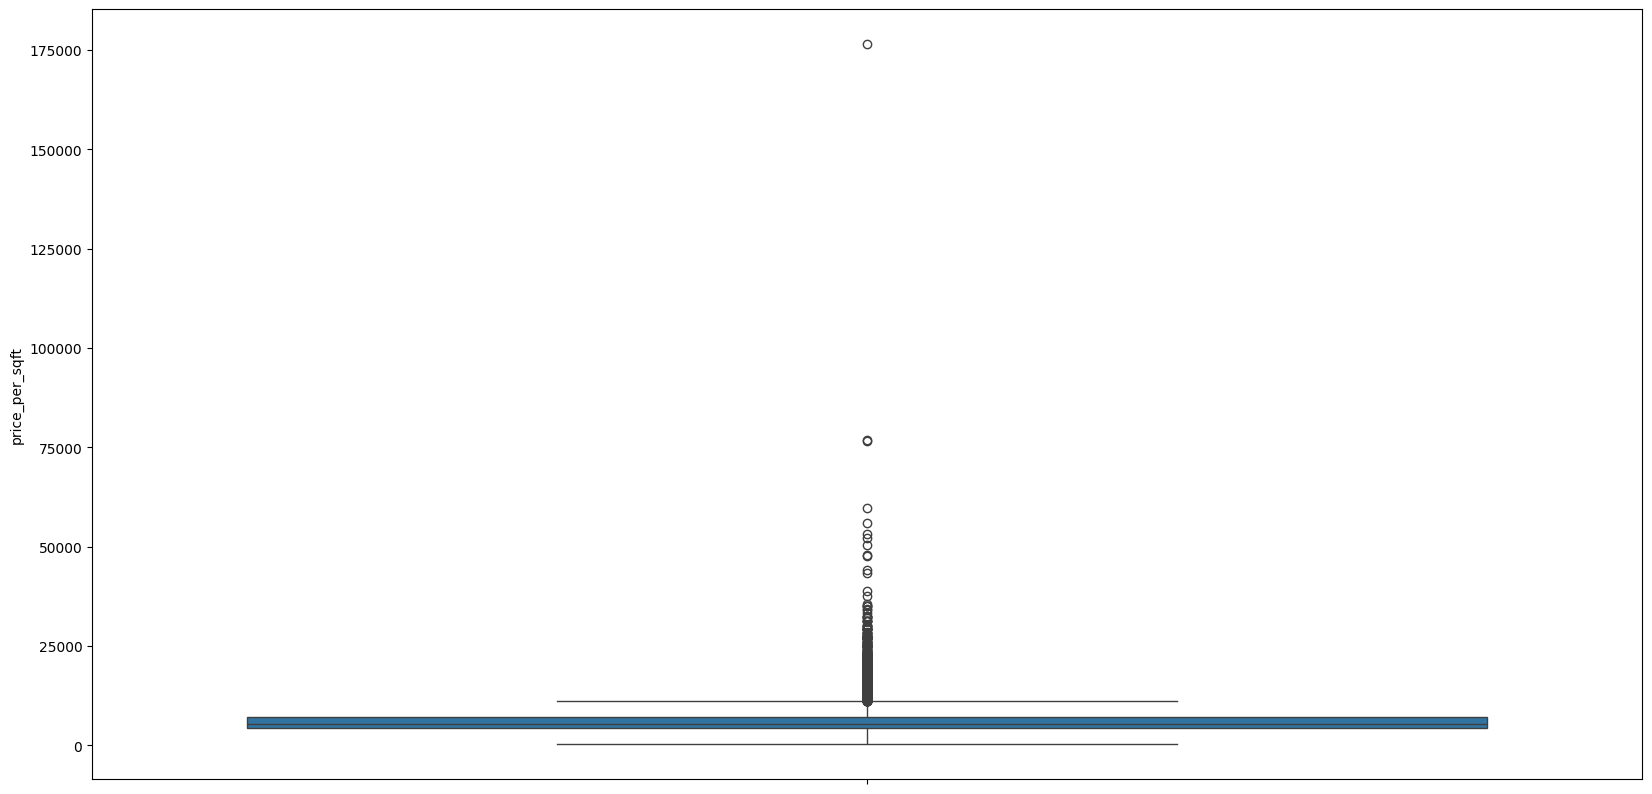

In [136]:
sns.boxplot(df6["price_per_sqft"])

Removing the outliers in `price_per_sqft` feature based on mean and one standard deviation for each group

In [137]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        mean = np.mean(sub_df.price_per_sqft)
        std = np.std(sub_df.price_per_sqft)
        
        reduced_df = sub_df[(sub_df.price_per_sqft > (mean-std)) & (sub_df.price_per_sqft <= (mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [138]:
df7 = remove_price_per_sqft_outliers(df6)
df7.shape

(9545, 7)

In [139]:
df7.price_per_sqft.describe()

count     9545.00000
mean      5734.07778
std       2300.08376
min       1250.00000
25%       4285.72000
50%       5219.56000
75%       6508.88000
max      24509.81000
Name: price_per_sqft, dtype: float64

<Axes: ylabel='price_per_sqft'>

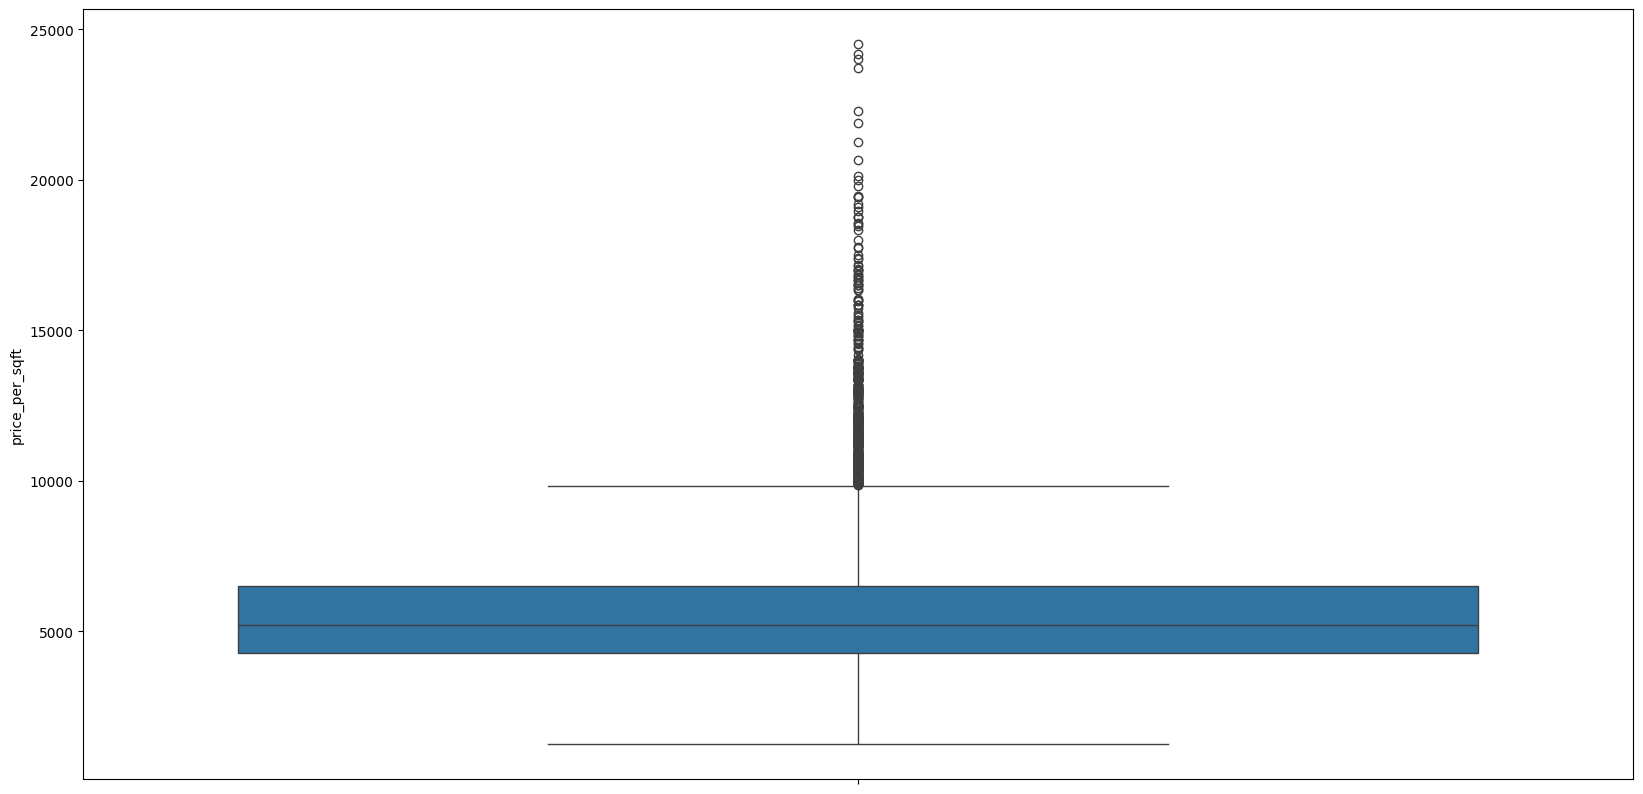

In [140]:
sns.boxplot(df7["price_per_sqft"])

##### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

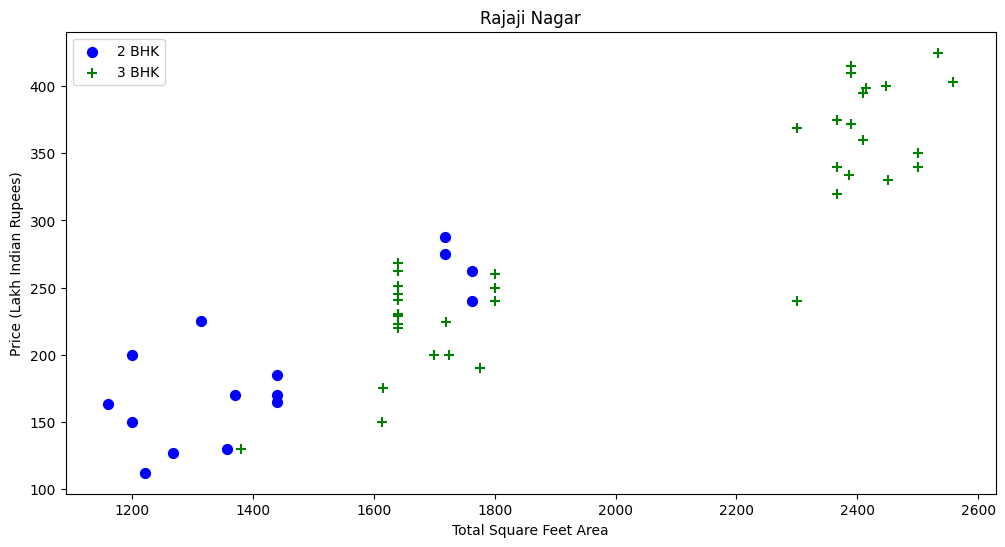

In [141]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (12,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Rajaji Nagar")

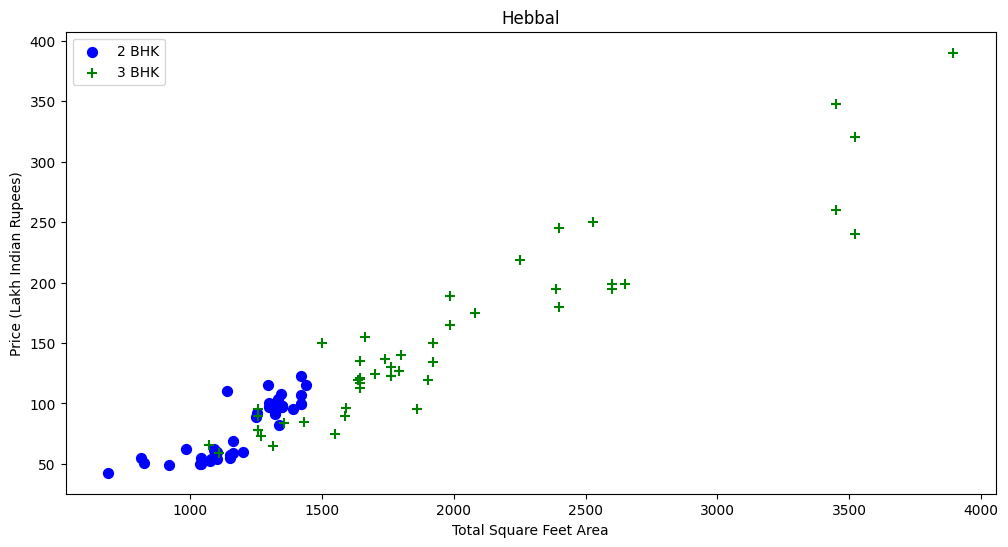

In [142]:
plot_scatter_chart(df7,"Hebbal")

In [143]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(6802, 7)

##### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

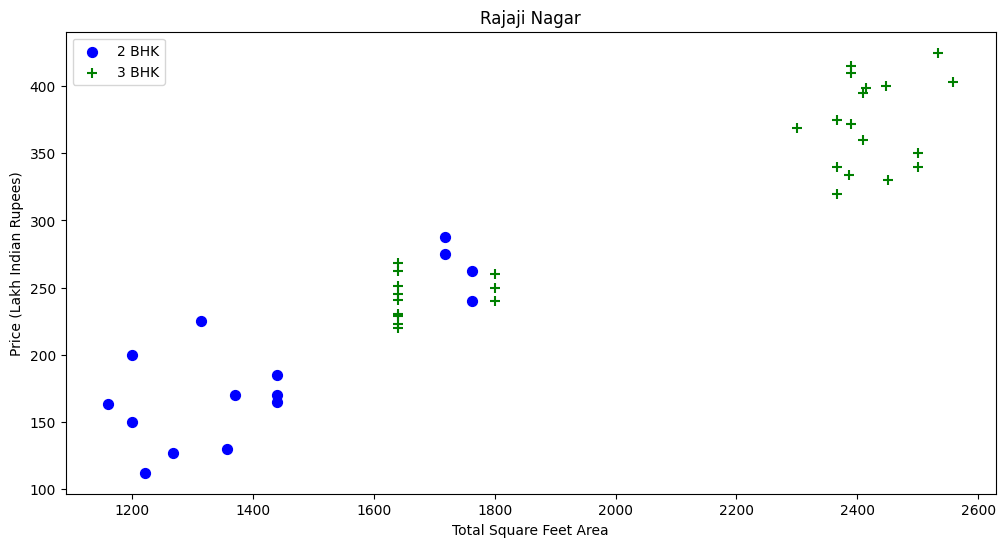

In [144]:
plot_scatter_chart(df8,"Rajaji Nagar")

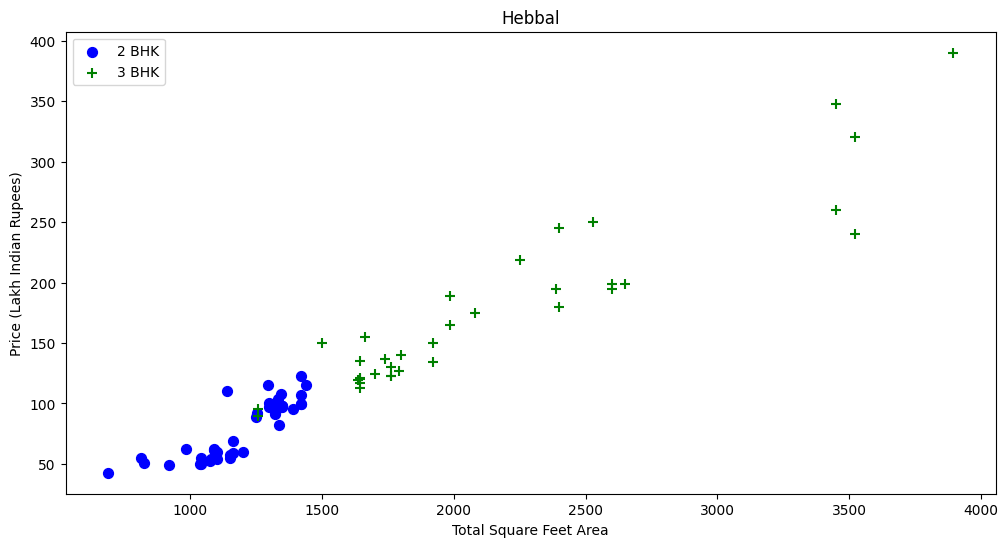

In [145]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

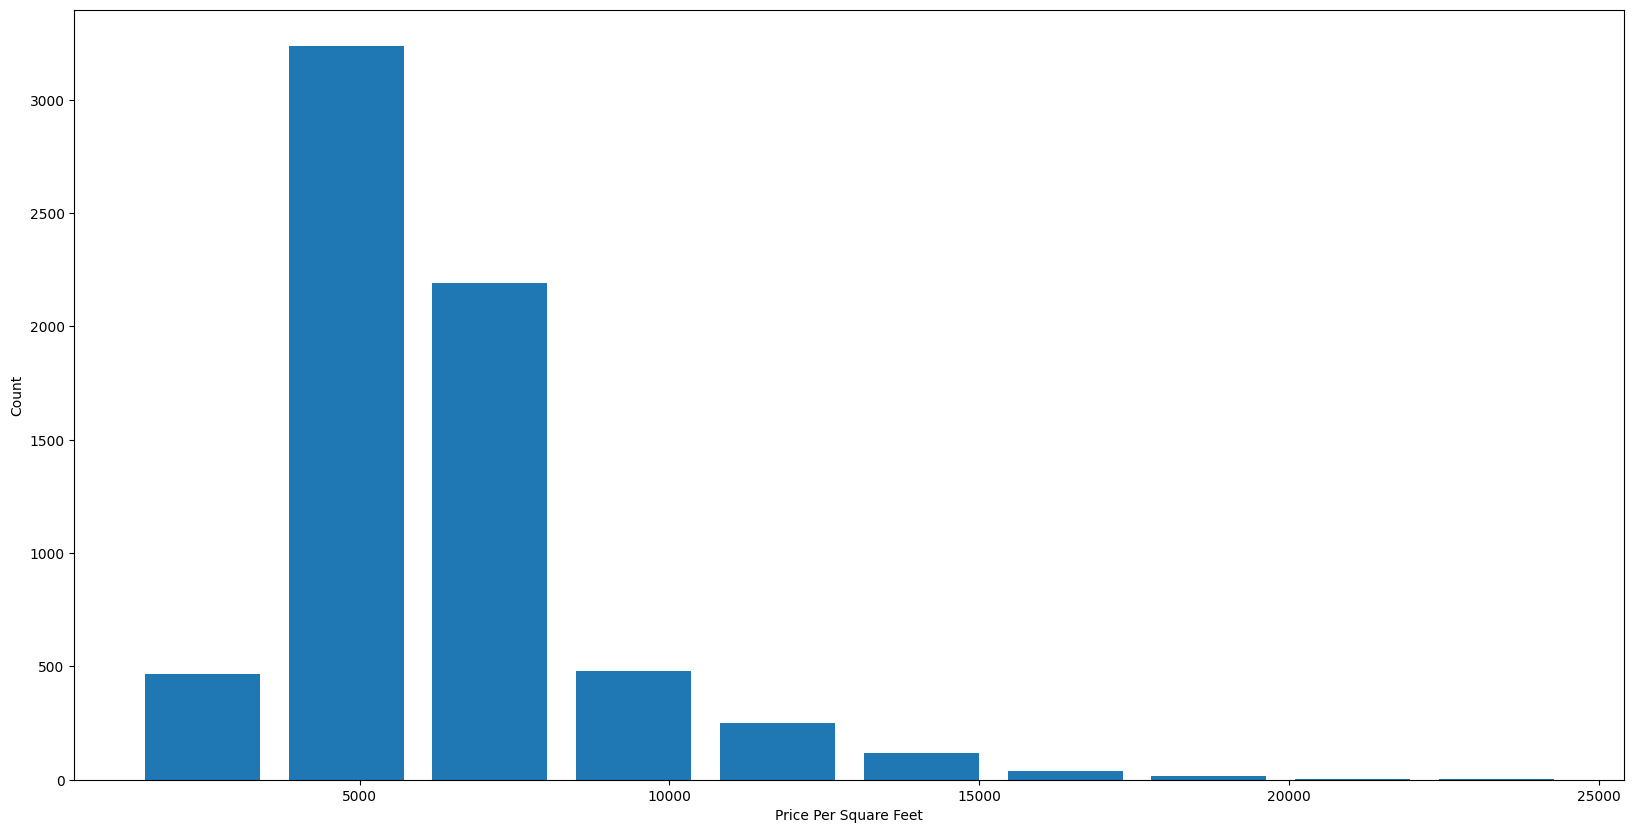

In [146]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature

In [147]:
df8["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  7.,  6.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

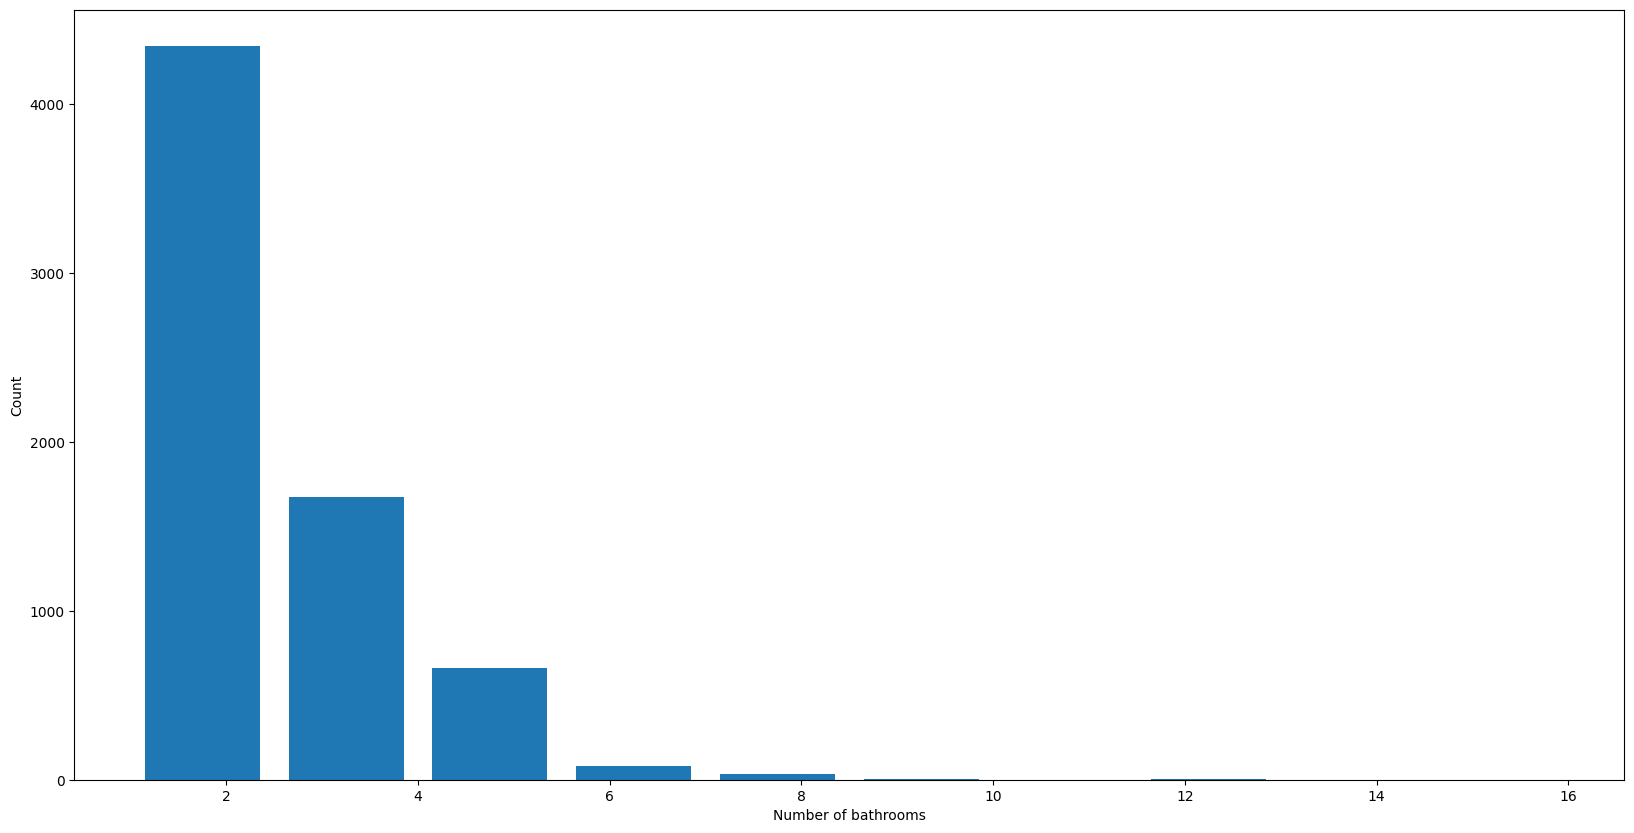

In [148]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [149]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4787,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.00
7775,other,10 BHK,12000.0,12.0,525.0,10.0,4375.00
7868,other,16 BHK,10000.0,16.0,550.0,16.0,5500.00
8610,other,11 BHK,6000.0,12.0,150.0,11.0,2500.00
8947,other,13 BHK,5425.0,13.0,275.0,13.0,5069.13


In [150]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1468,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.04
4756,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.58
6091,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.04
7697,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.90


If you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [151]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6721, 7)

In [152]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.55
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.85
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.34
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.34
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.81


#### keeping the columns which are useful for model building

In [153]:
df10 = df9[["location","total_sqft","bath","bhk","price"]]
df10.head()

,location,total_sqft,bath,bhk,price
0,1st Block Jayanagar,2850.0,4.0,4.0,428.0
1,1st Block Jayanagar,1630.0,3.0,3.0,194.0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0
3,1st Block Jayanagar,1200.0,2.0,3.0,130.0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0


In [155]:
df10.duplicated().sum()

76

In [158]:
df10[df10.duplicated(keep=False)].sort_values(by=["location","total_sqft"])

,location,total_sqft,bath,bhk,price
1598,Devarachikkanahalli,1230.0,2.0,2.0,58.00
1603,Devarachikkanahalli,1230.0,2.0,2.0,58.00
3947,Kengeri,1200.0,2.0,2.0,58.00
3973,Kengeri,1200.0,2.0,2.0,58.00
4991,Rachenahalli,440.0,1.0,1.0,28.00
4994,Rachenahalli,440.0,1.0,1.0,28.00
6637,Whitefield,905.0,1.0,1.0,52.00
6666,Whitefield,905.0,1.0,1.0,52.00
7585,other,500.0,1.0,1.0,20.00
8634,other,500.0,1.0,1.0,20.00


In [159]:
df10 = df10.drop_duplicates()

In [160]:
df10.duplicated().sum()

0

### Use One Hot Encoding For Location

In [161]:
dummies = pd.get_dummies(df10["location"])

In [162]:
dummies = dummies.astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,3.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,3.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [166]:
df12.shape

(6645, 234)

In [167]:
X = df12.drop(["price"],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [169]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def model_scores(model_name, model, X, y):
    """
    Evaluate the performance of a machine learning model using cross-validation and test set.

    Parameters:
    - model_name (str): Name of the model.
    - model: Machine learning model object.
    - X (DataFrame): Feature matrix.
    - y (array-like): Target variable.

    Returns:
    - dict: Dictionary containing model name, mean R^2 score, and mean absolute error.
    """
    output = {'model_name': model_name}

    try:
        # K-fold cross-validation
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kfold, scoring="r2")
        output['mean_r2_score'] = scores.mean()

        # Train-test split for hold-out evaluation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        output['mean_absolute_error'] = mean_absolute_error(y_test, y_pred)

    except Exception as e:
        output['error'] = str(e)

    return output

In [170]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

model_dict = {
    "linear_reg":LinearRegression(),
    "svr":SVR(),
    "ridge":Ridge(),
    "LASSO":Lasso(),
    "decision tree":DecisionTreeRegressor(),
    "random forest":RandomForestRegressor(),
    "extra trees":ExtraTreesRegressor(),
    "gradient boosting":GradientBoostingRegressor(),
    "adaboost":AdaBoostRegressor(),
    "xgb":XGBRegressor()
}

In [171]:
for model_name,model in model_dict.items():
    print(model_scores(model_name,model,X,y))

{'model_name': 'linear_reg', 'mean_r2_score': 0.8385757358509555, 'mean_absolute_error': 18.446682229002143}
{'model_name': 'svr', 'mean_r2_score': 0.578988524998765, 'mean_absolute_error': 23.06560072528723}
{'model_name': 'ridge', 'mean_r2_score': 0.8381331194478063, 'mean_absolute_error': 18.269102612586906}
{'model_name': 'LASSO', 'mean_r2_score': 0.7075022428223592, 'mean_absolute_error': 24.43463778628715}
{'model_name': 'decision tree', 'mean_r2_score': 0.6834220886556126, 'mean_absolute_error': 22.44608146623045}
{'model_name': 'random forest', 'mean_r2_score': 0.7688921176677385, 'mean_absolute_error': 20.373898479341456}
{'model_name': 'extra trees', 'mean_r2_score': 0.7670157319656603, 'mean_absolute_error': 20.99578998779688}
{'model_name': 'gradient boosting', 'mean_r2_score': 0.770604801013839, 'mean_absolute_error': 19.827496789816973}
{'model_name': 'adaboost', 'mean_r2_score': 0.6175014918756967, 'mean_absolute_error': 28.644675955803542}
{'model_name': 'xgb', 'mean_r2

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7894084809842123

#### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [172]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86988441, 0.81176155, 0.79529905, 0.77622891, 0.77414249])

### Testing the Models

In [173]:
X.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [175]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.90447351212696

In [176]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

87.52162154863564

In [177]:
predict_price('Indira Nagar',2000, 4, 2)

280.13080345055533

In [178]:
predict_price('Indira Nagar',1000, 4, 3)

194.6772362142342

### Export the tested model to a pickle file

In [179]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

### Export location and column information to a file that will be useful later on in our prediction application

In [182]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))